In [1]:
#Loading Dependies 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/21. sales_data_final.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [5]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [6]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [9]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [10]:
df["order_id"].unique()

array(['AG-2011-2040', 'IN-2011-47883', 'HU-2011-1220', ...,
       'MX-2014-108574', 'MO-2014-2560', 'CA-2014-156720'],
      shape=(25035,), dtype=object)

In [11]:
def uniquevalue(col):
    print(f"Details of {col} columns :",df[col].unique())

In [12]:
for col in df.columns:
    uniquevalue(col)
    print()
    print("-"*50)

Details of order_id columns : ['AG-2011-2040' 'IN-2011-47883' 'HU-2011-1220' ... 'MX-2014-108574'
 'MO-2014-2560' 'CA-2014-156720']

--------------------------------------------------
Details of order_date columns : ['1/1/2011' '1/2/2011' '1/3/2011' ... '12/29/2014' '12/30/2014'
 '12/31/2014']

--------------------------------------------------
Details of ship_date columns : ['1/6/2011' '1/8/2011' '1/5/2011' ... '1/5/2015' '1/6/2015' '1/7/2015']

--------------------------------------------------
Details of ship_mode columns : ['Standard Class' 'Second Class' 'Same Day' 'First Class']

--------------------------------------------------
Details of customer_name columns : ['Toby Braunhardt' 'Joseph Holt' 'Annie Thurman' 'Eugene Moren'
 'Magdelene Morse' 'Kean Nguyen' 'Ken Lonsdale' 'Lindsay Williams'
 'Larry Blacks' 'Dorothy Dickinson' 'Dennis Pardue' 'Stewart Visinsky'
 "Jas O'Carroll" 'Chris McAfee' 'Nat Gilpin' 'Jack Garza'
 'Russell Applegate' 'Maya Herman' 'Beth Thompson' 'Arthur Pr

In [13]:
catvars = df.select_dtypes(include=['object']).columns

numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
        'segment', 'state', 'country', 'market', 'region', 'product_id',
        'category', 'sub_category', 'product_name', 'sales', 'order_priority'],
       dtype='object'),
 Index(['quantity', 'discount', 'profit', 'shipping_cost', 'year'], dtype='object'))

In [14]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [15]:
df["order_date"].dtype

dtype('<M8[ns]')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

In [17]:
def valuecounts(col):
    print(f"Value count of {col} column: ",df[col].value_counts())

In [18]:
for col in df.columns:
    valuecounts(col)
    print()
    print("*"*50)

Value count of order_id column:  order_id
CA-2014-100111     14
TO-2014-9950       13
IN-2012-41261      13
MX-2014-166541     13
NI-2014-8880       13
                   ..
ES-2014-2815584     1
IN-2014-78228       1
MX-2014-122511      1
OD-2014-9490        1
ES-2011-4869686     1
Name: count, Length: 25035, dtype: int64

**************************************************
Value count of order_date column:  order_date
2014-06-18    135
2014-11-18    127
2014-09-03    126
2014-11-20    118
2014-12-29    116
             ... 
2012-08-19      1
2014-02-09      1
2011-02-27      1
2011-01-16      1
2011-01-02      1
Name: count, Length: 1430, dtype: int64

**************************************************
Value count of ship_date column:  ship_date
2014-11-22    130
2014-09-07    115
2014-12-07    101
2014-11-17    101
2014-11-29    100
             ... 
2013-03-21      3
2015-01-07      3
2011-01-05      2
2011-01-06      2
2011-01-03      2
Name: count, Length: 1464, dtype: int64

****

# Exploratory Data Analysis¶¶

In [19]:
#checking the frequency of order yearwise
df["year"].unique()

array([2011, 2012, 2013, 2014])

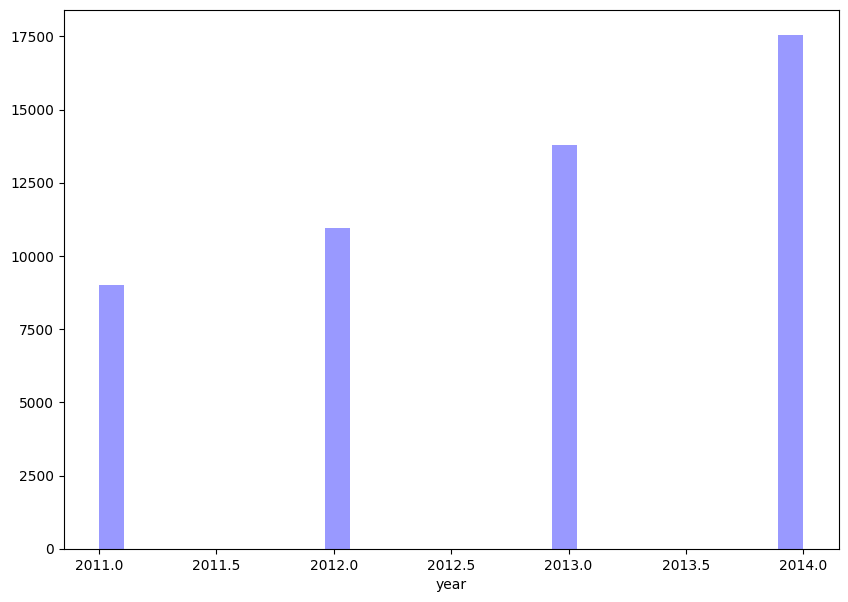

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(df["year"],color="blue",kde=False)
plt.show()

Insight:
from above analysis, most of the order came in year 2014

In [21]:
#find out which shipping mode is preffered mostly

df["ship_mode"].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [32]:
df["ship_mode"].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

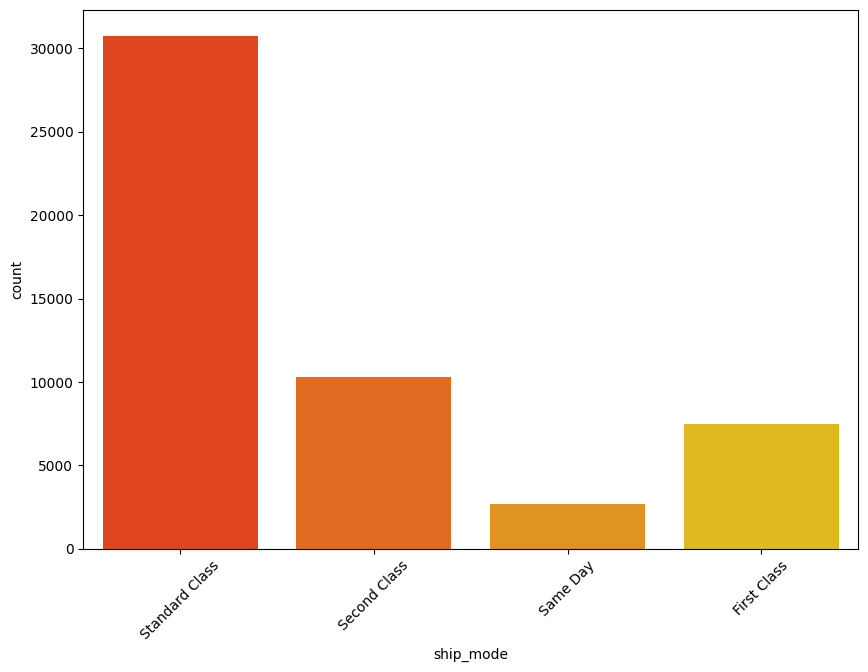

In [33]:
#Visualization of data
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df["ship_mode"],palette="autumn")
plt.xticks(rotation=45)
plt.show()

Insights:

From above observation most of diliveries has done in standard class

In [43]:
# find out time required to deleveried the item after shipping
from datetime import datetime ,timedelta

df["Shipping_time"] = df["ship_date"] - df["order_date"]

In [44]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Shipping_time
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,5 days
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,7 days
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011,4 days
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011,4 days
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011,7 days


In [47]:
df["Shipping_time"].unique()

<TimedeltaArray>
['5 days', '7 days', '4 days', '0 days', '6 days', '2 days', '3 days',
 '1 days']
Length: 8, dtype: timedelta64[ns]

In [50]:
df["Shipping_time"].value_counts()

Shipping_time
4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: count, dtype: int64

In [52]:
#visualizing
numeric_df = df.select_dtypes(include="number")
numeric_df

,quantity,discount,profit,shipping_cost,year,Shipping_time
0,2,0.0,106.1400,35.46,2011,5 days
1,3,0.1,36.0360,9.72,2011,7 days
2,4,0.0,29.6400,8.17,2011,4 days
3,3,0.5,-26.0550,4.82,2011,4 days
4,5,0.1,37.7700,4.70,2011,7 days
...,...,...,...,...,...,...
51285,2,0.2,4.5188,0.89,2014,4 days
51286,1,0.0,0.4200,0.49,2014,5 days
51287,3,0.0,12.3600,0.35,2014,2 days
51288,1,0.0,0.5600,0.20,2014,6 days


In [53]:
numeric_df.corr()

,quantity,discount,profit,shipping_cost,year,Shipping_time
quantity,1.000000,-0.019875,0.104743,0.272649,-0.005049,0.004347
discount,-0.019875,1.000000,-0.316375,-0.079056,-0.005894,-0.001507
profit,0.104743,-0.316375,1.000000,0.357033,0.002661,0.001543
shipping_cost,0.272649,-0.079056,0.357033,1.000000,-0.003136,-0.142823
year,-0.005049,-0.005894,0.002661,-0.003136,1.000000,-0.003427
Shipping_time,0.004347,-0.001507,0.001543,-0.142823,-0.003427,1.000000


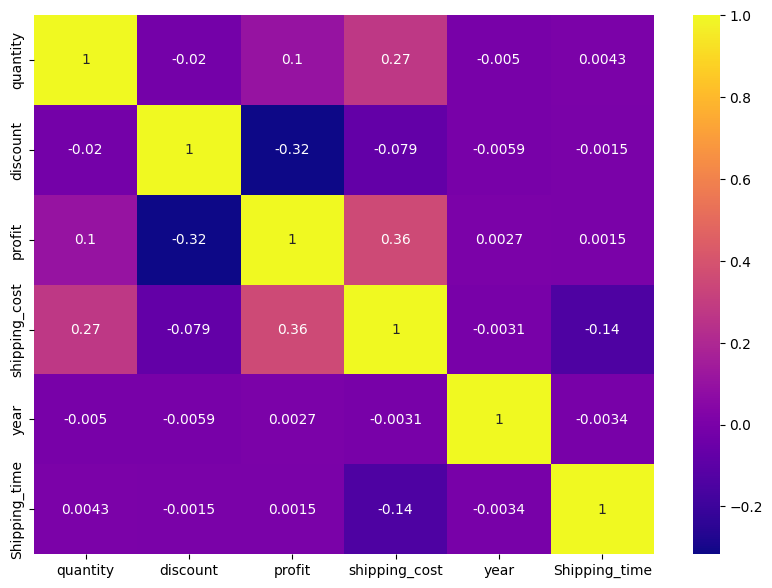

In [54]:
plt.figure(figsize=(10,7))

sns.heatmap(numeric_df.corr(),annot=True,cmap="plasma")
plt.show()

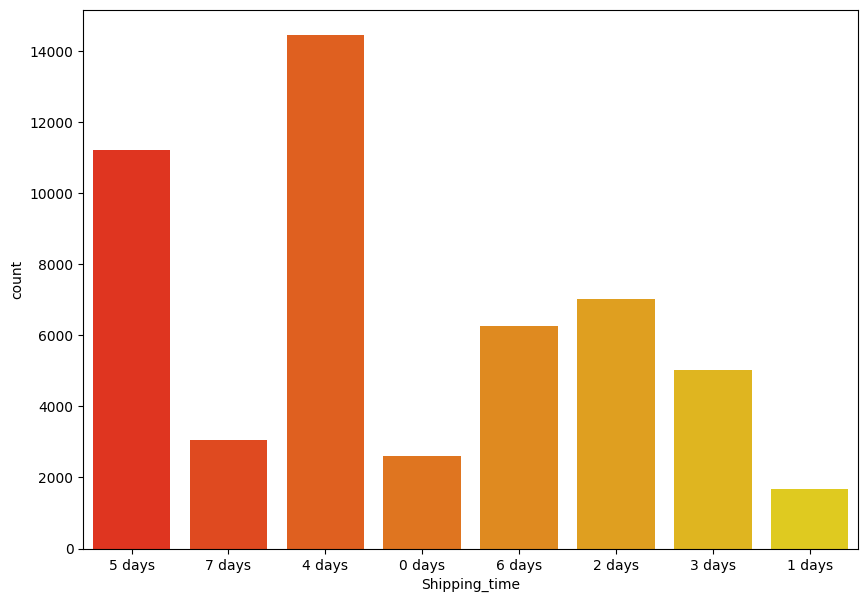

In [56]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df["Shipping_time"],palette="autumn")
plt.show()

from above observation most of the order has been delivered in 4 day and very few order are delivered in one days

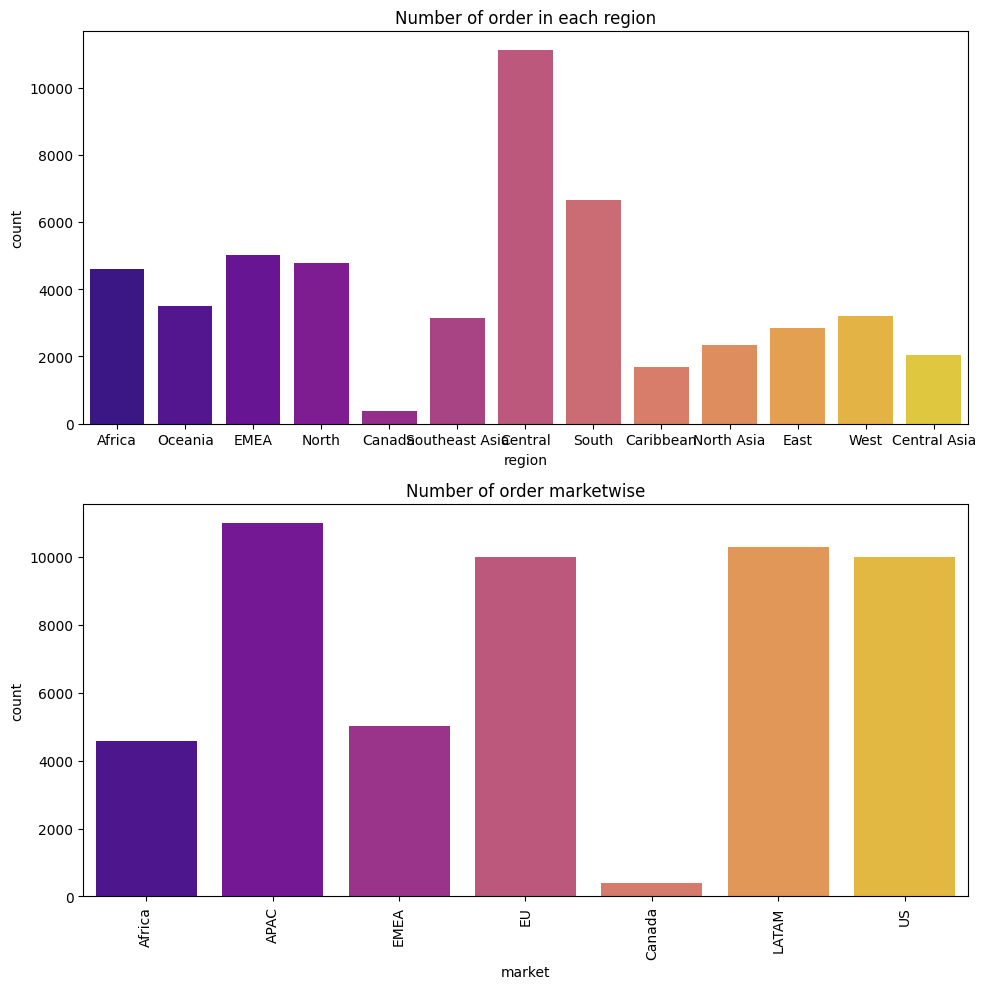

In [44]:
# Analysising the number of order statewise ,countrywise, regionwise and market wise

list_1 = ["state","country","market","region"]

fig, axes = plt.subplots(2,1,figsize=(10,10))

#plt 1
# sns.countplot(data=df,x=df["state"],palette="plasma",ax=axes[0])
# plt.title("Number of order in each state")
# plt.xticks(rotation=90)

#plt 2
sns.countplot(data=df,x=df["region"],palette="plasma",ax=axes[0])
axes[0].set_title("Number of order in each region")
plt.xticks(rotation=90)

#plt 3
sns.countplot(data=df,x=df["market"],palette="plasma",ax=axes[1])
axes[1].set_title("Number of order marketwise")
plt.xticks(rotation=90)

#plt 4
# sns.countplot(data=df,x=df["country"],palette="plasma",ax=axes[3])
# plt.title("Number of order in each Country")
# plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [50]:
def count_plot(col):
    plt.figure(figsize=(8,7))
    sns.countplot(data=df,x=df[col],palette="plasma")
    plt.xticks(rotation = 90)
    plt.title(f"Number of Order {col}wise")
    plt.tight_layout()
    plt.show()

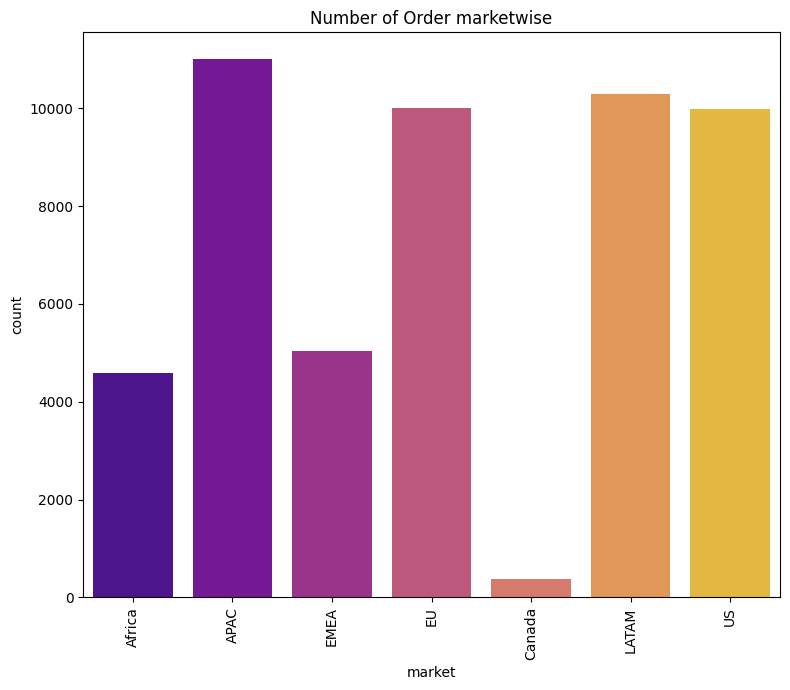

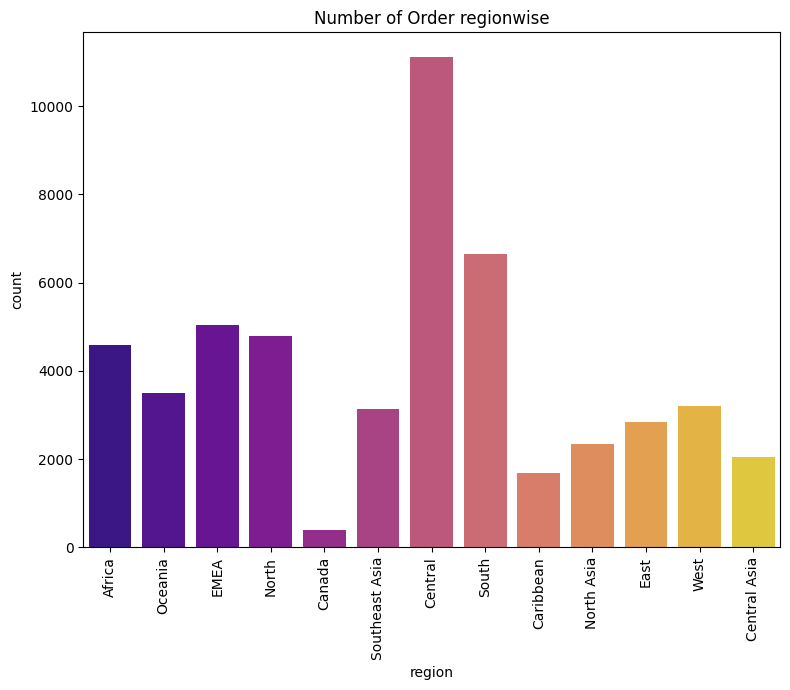

In [51]:
list_1 = ["market","region"]

for col in list_1:
    count_plot(col)
    print()
    print()

In [52]:
df["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [53]:
df["category"].value_counts()

category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

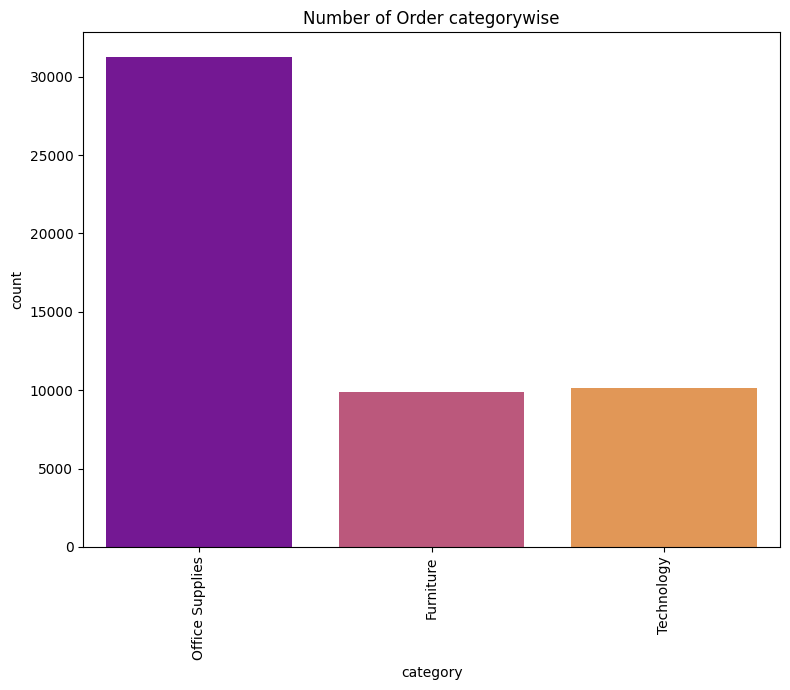

In [54]:
count_plot("category")

Insights: from the above plot it is clear that most of the orders are came for office supplies category

In [60]:
df["product_name"].value_counts()

product_name
Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Konica Minolta magicolor 1690MF Multifunction Printer                          1
Xerox 1901                                                                     1
Panasonic BusinessÿTelephonesÿKX-T7736                                         1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order      1
Acco Glide Clips                                                               1
Name: count, Length: 3788, dtype: int64

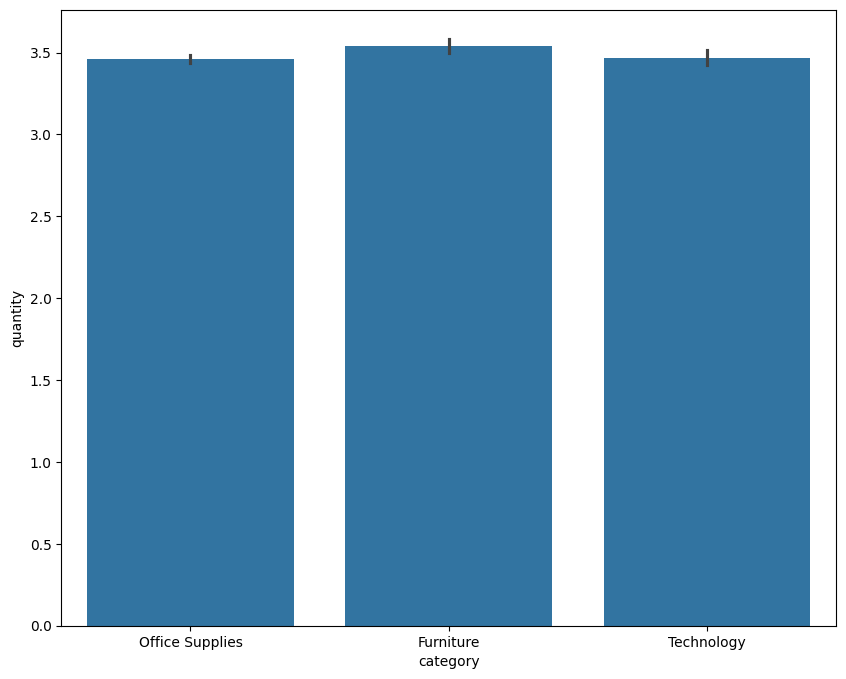

In [62]:
# Bar plot
plt.figure(figsize=(10,8))
sns.barplot(x=df["category"],y=df["quantity"])
plt.show()

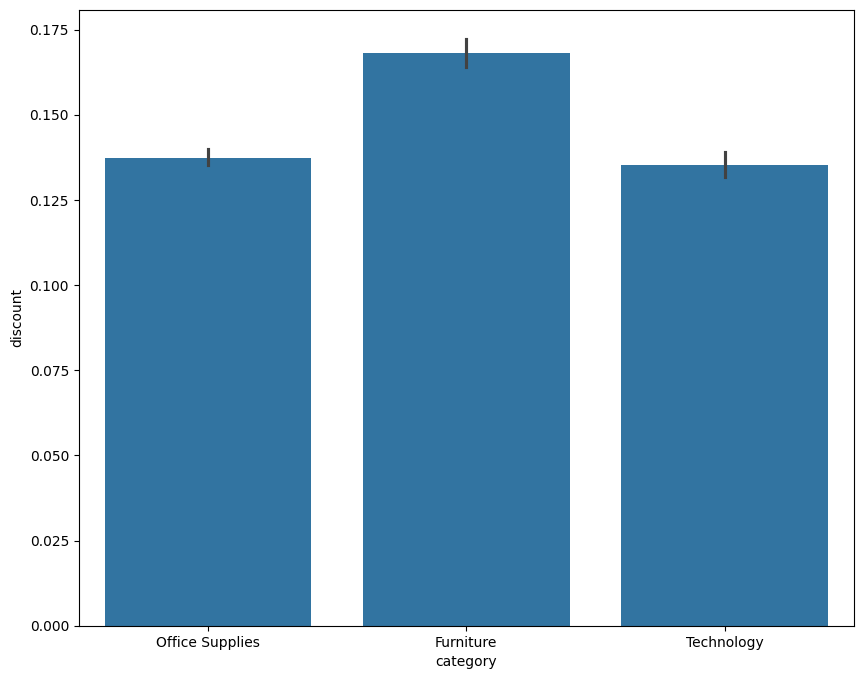

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["category"],y=df["discount"])
plt.show()

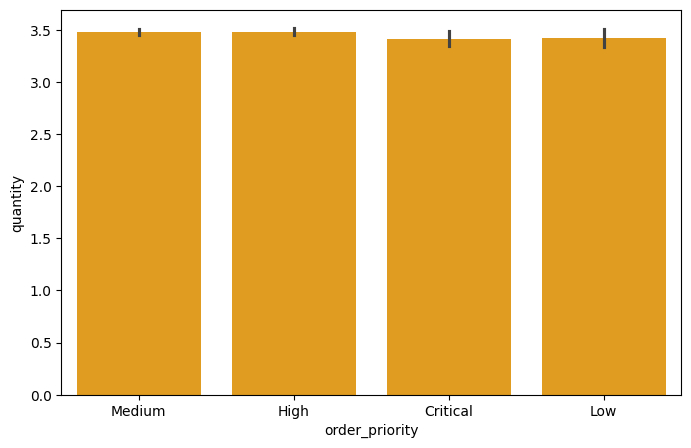

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["order_priority"],y=df["quantity"],color='orange')
plt.show()